In [1]:
import numpy as np
from focusfeedbackgui import cylinderlens

# Perform a calibration

Using channels (1,), sigma: [1.7213698630136984] px


Fitting localisations:   0%|          | 0/10100 [00:00<?, ?it/s]

θ = 0.002696710321722546 ± 0.00035210343108236353


Fitting localisations:   0%|          | 0/10100 [00:00<?, ?it/s]

To put in CylLensGUI config file:
[cyllens_name]100x16:
  q: [2.2274221460349373, -0.4137971633743669, 0.8436063556850104, 0.5119230722225611, 0.0636347867946696, 0.35642430555607607, -0.2083162098396398, 0.013345658310595091, 0.2350145008325068]
  theta: 0.002696710321722546


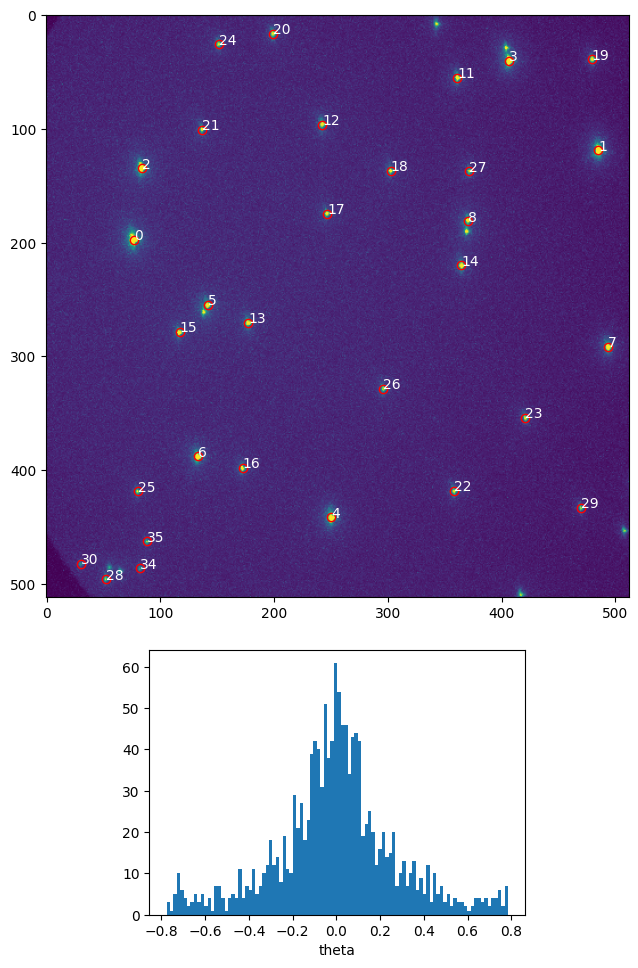

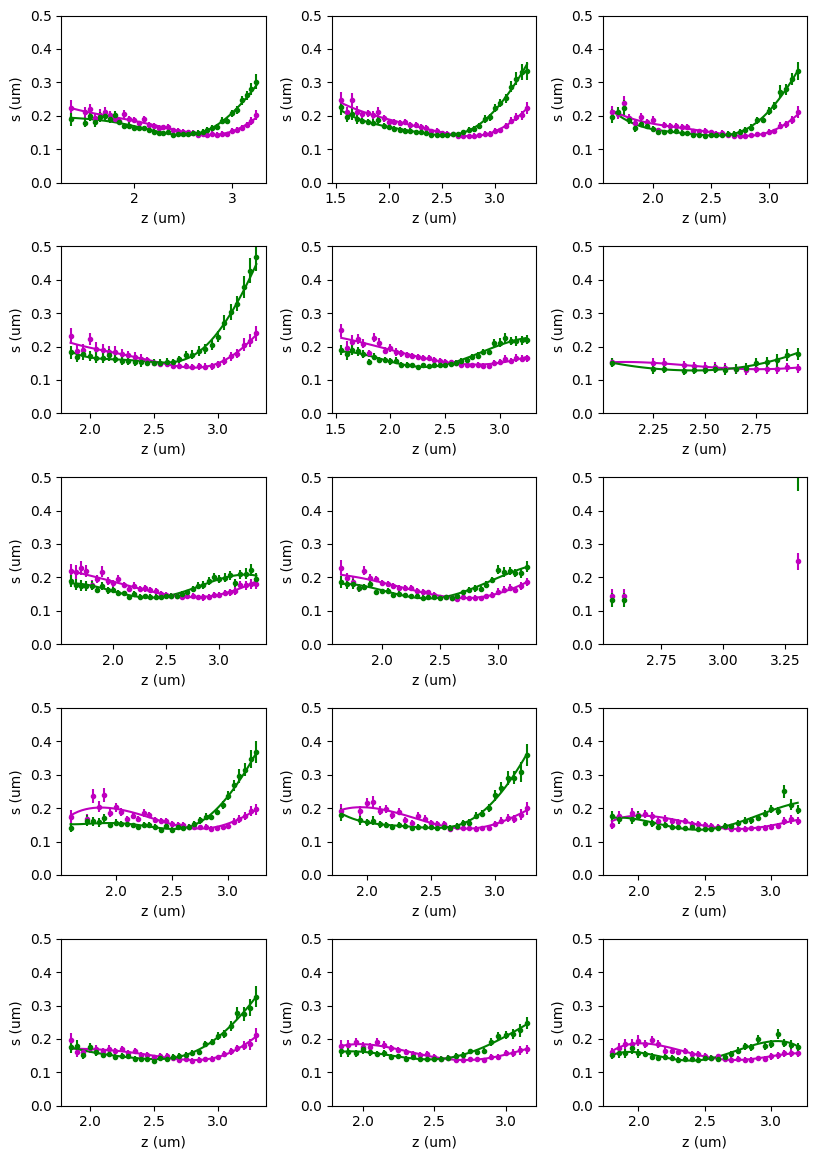

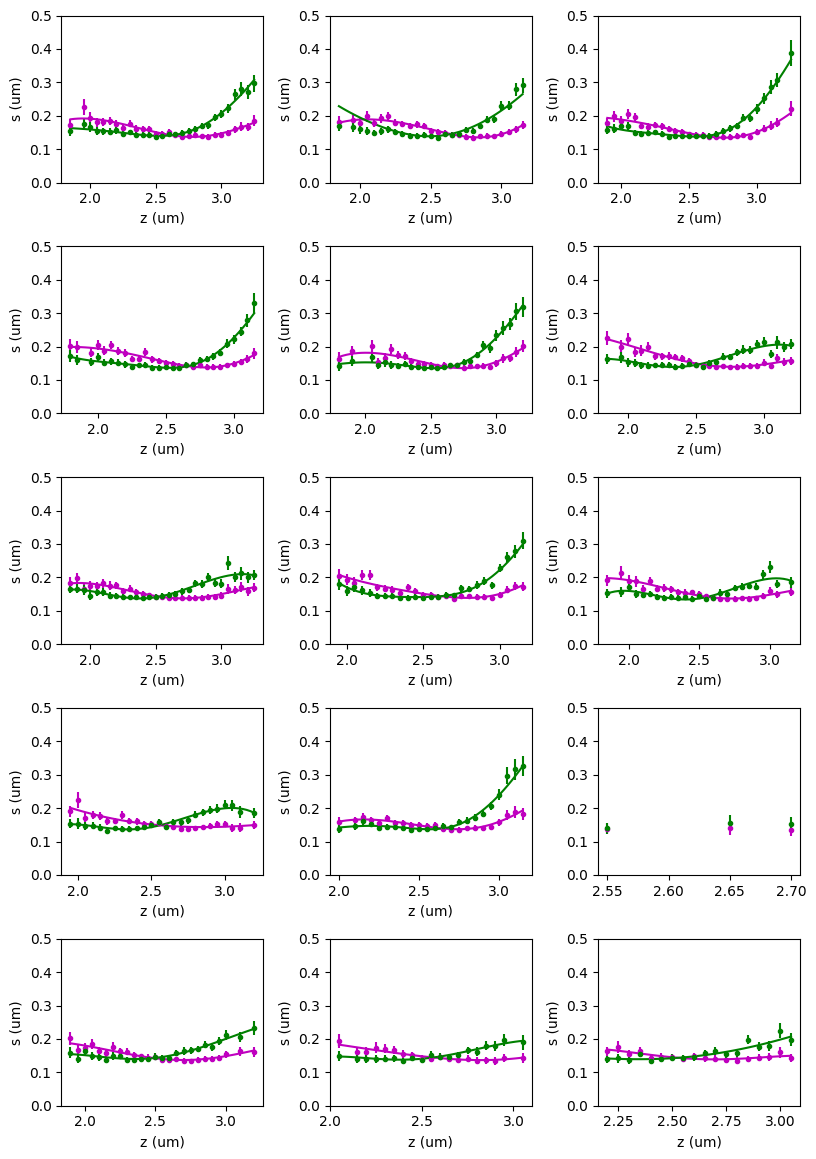

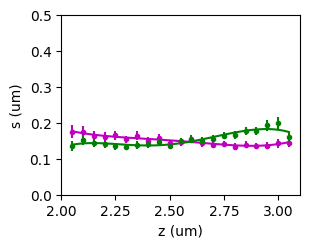

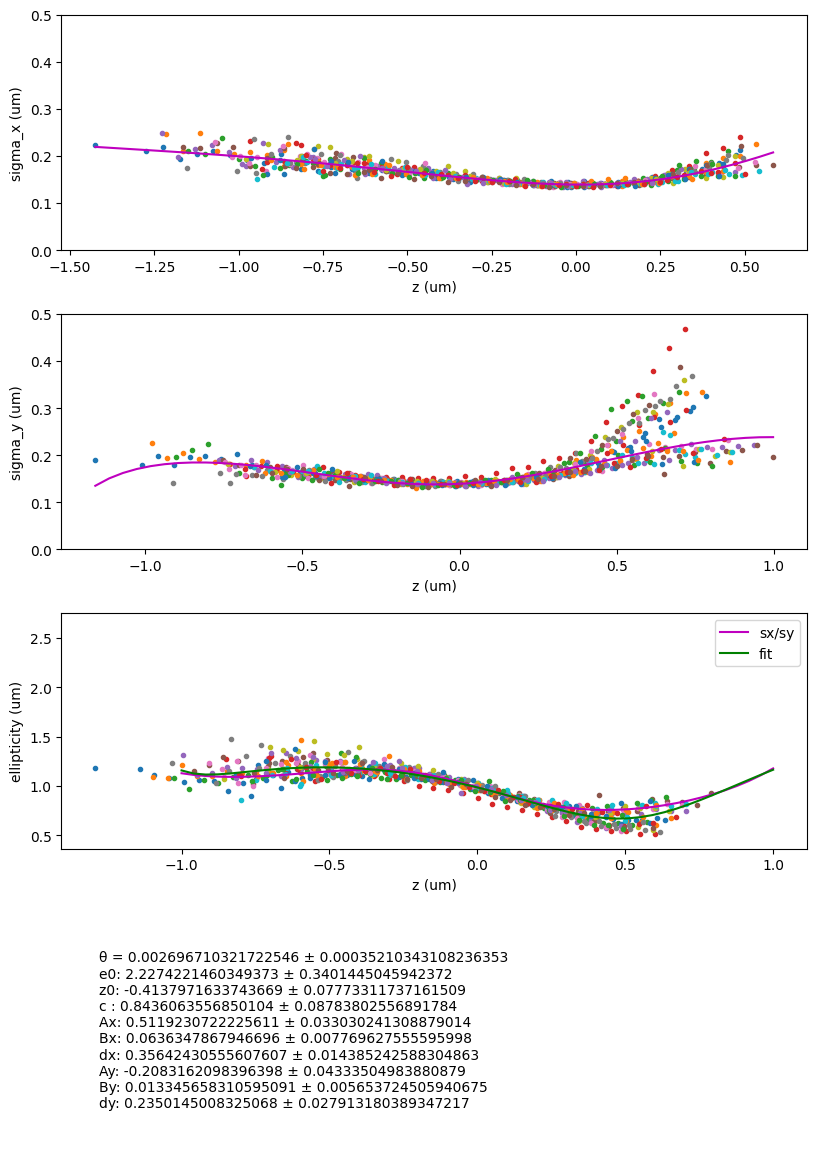

In [2]:
res = cylinderlens.calibrate_z("/DATA/lenstra_lab/w.pomp/data/20190417/21_beads.czi", (642, 488), (1,))

# Assess the performance of the focus feedback system

In [3]:
# get calibration parameters, bead z positions and elipticities from the calibration

q = res["q"]  # calibration parameters
Ze = res["Ze"]  # z position wrt. to focus
E = res["E"]  # ellipticity

Usable range: 568 nm
Standard deviation of the error: 65 nm


(568.4328035405127, 64.65066008846671)

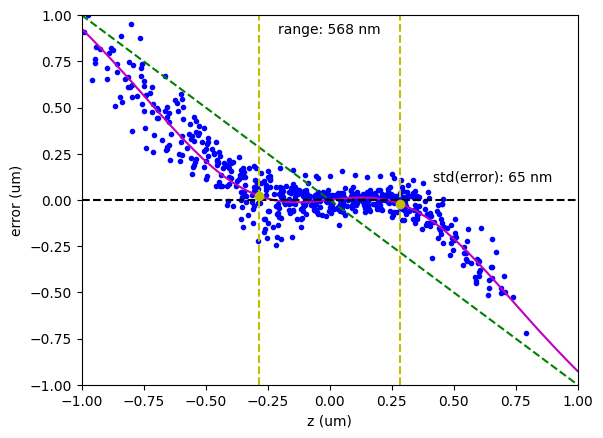

In [4]:
# position error vs. position wrt to focus
# yellow lines show the range in which the particle can be found and brought back to focus
# in that range, accuracy of finding the focus from the ellipticy is given by
#     the standard deviation of the error
cylinderlens.error_plot(Ze, np.array([cylinderlens.find_z(e, q) for e in E]) - Ze)